<a href="https://colab.research.google.com/github/emm-gl/Referenz/blob/master/A2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import numpy as np
from tensorflow.keras.utils import to_categorical
import cv2
import matplotlib as plt

from google.colab import drive
drive.mount('/content/drive/')

import glob

from skimage. feature import hog
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns

from PIL import Image
import os



Mounted at /content/drive/


In [ ]:
# Data
x_test_path = '/content/drive/MyDrive/Datasets/Test.npy'
x_train_path = '/content/drive/MyDrive/Datasets/Train.npy'
y_test_path = '/content/drive/MyDrive/Datasets/y_test.npy'
y_train_path = '/content/drive/MyDrive/Datasets/y_train.npy'

x_test = np.load(x_test_path)
x_train = np.load(x_train_path)
y_test = np.load(y_test_path)
y_train = np.load(y_train_path)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(39209, 28, 28)
(12630, 28, 28)
(39209,)
(12630,)


In [ ]:
#Codigo para mostrar imagenes del set, no es necesario ejecutarlo, solo imprime unos numeros :)
import matplotlib.pyplot as plt
filas = 2
columnas = 8
num = filas*columnas
imagenes = x_train[0:num]
etiquetas = y_train[0:num]
fig, axes = plt.subplots(filas, columnas, figsize=(1.5*columnas,2*filas))
for i in range(num):
     ax = axes[i//columnas, i%columnas]
     ax.imshow(imagenes[i].reshape(28,28), cmap='gray_r')
     ax.set_title('Label: {}'.format(np.argmax(etiquetas[i])))
plt.tight_layout()
plt.show()

In [ ]:
#reshape just reinterprets the shape from (60000, 28, 28) to (60000, 28, 28, 1), because Keras needs four dimensions.
x_train = np.reshape(x_train, np.append(x_train.shape, (1)))
x_test = np.reshape(x_test, np.append(x_test.shape, (1)))

print ('X Train', x_train.shape, ' -X Test', x_test.shape)
print ('Y Train', y_train.shape, ' - Y Test', y_test.shape)

X Train (39209, 28, 28, 1)  -X Test (12630, 28, 28, 1)
Y Train (39209,)  - Y Test (12630,)


In [ ]:
#Normalizar las intensidades de las imágenes:
#We should also resize the samples so that instead of being in the 0-255 range, they are in the 0-1 range, 
#as that helps the neural network to achieve better results:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

#One hot encoding the labels:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [ ]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
model = tf.keras.models.Sequential([

  tf.keras.layers.Conv2D(filters=6, kernel_size=(5, 5), activation='relu', padding='same', input_shape = x_train.shape[1:]),
  tf.keras.layers.MaxPooling2D(),
  
  tf.keras.layers.Conv2D(filters=16, kernel_size=(5,5), activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(units=120, activation='relu'),
  tf.keras.layers.Dense(units=84, activation='relu'),
  tf.keras.layers.Dense(units=43, activation='softmax')
])

model.compile(loss = 'categorical_crossentropy', optimizer='adam',
    metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_52 (Conv2D)          (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d_49 (MaxPoolin  (None, 14, 14, 6)        0         
 g2D)                                                            
                                                                 
 conv2d_53 (Conv2D)          (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_50 (MaxPoolin  (None, 5, 5, 16)         0         
 g2D)                                                            
                                                                 
 flatten_24 (Flatten)        (None, 400)               0         
                                                                 
 dense_60 (Dense)            (None, 120)             

In [ ]:
#Entrenar la red. Toma un buen rato! Ve por un café ;)
#Oye suscribete al canal!
print("Entrenando modelo...");
epocas=60
history = model.fit(
    x_train, y_train, batch_size=16,
    epochs=epocas,
    validation_data=(x_test, y_test), shuffle = True
)

print("Modelo entrenado!");

Entrenando modelo...
Epoch 1/60
2451/2451 [==============================] - 44s 18ms/step - loss: 0.5442 - accuracy: 0.8457 - val_loss: 0.6361 - val_accuracy: 0.8588
Epoch 2/60
2451/2451 [==============================] - 45s 18ms/step - loss: 0.1844 - accuracy: 0.9503 - val_loss: 0.5690 - val_accuracy: 0.8863
Epoch 3/60
2451/2451 [==============================] - 44s 18ms/step - loss: 0.1110 - accuracy: 0.9683 - val_loss: 0.5626 - val_accuracy: 0.8985
Epoch 4/60
2451/2451 [==============================] - 43s 18ms/step - loss: 0.0797 - accuracy: 0.9781 - val_loss: 0.6166 - val_accuracy: 0.9006
Epoch 5/60
2451/2451 [==============================] - 43s 17ms/step - loss: 0.0595 - accuracy: 0.9831 - val_loss: 0.4759 - val_accuracy: 0.9137
Epoch 6/60
2451/2451 [==============================] - 49s 20ms/step - loss: 0.0482 - accuracy: 0.9851 - val_loss: 0.6635 - val_accuracy: 0.8945
Epoch 7/60
2451/2451 [==============================] - 53s 21ms/step - loss: 0.0409 - accuracy: 0.9884

In [ ]:
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

395/395 [==============================] - 4s 9ms/step - loss: 1.5942 - accuracy: 0.9278
Test loss: 1.5941606760025024
Test accuracy: 0.9277909994125366


Text(0.5, 0, 'epoch')

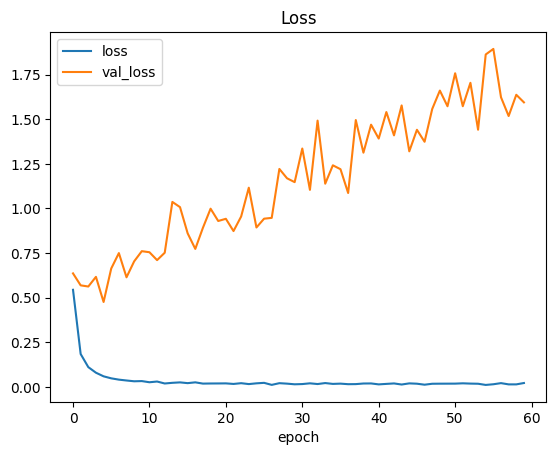

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

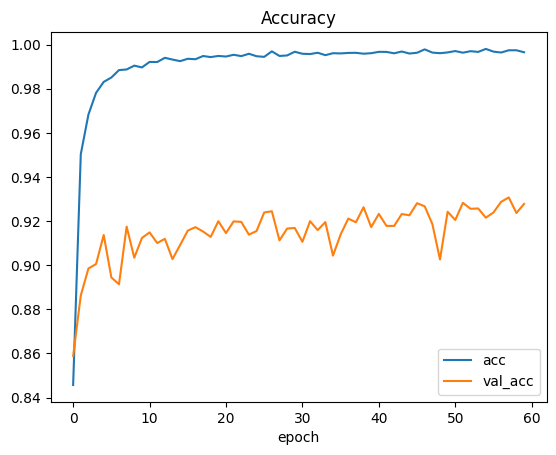

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['acc', 'val_acc'])
plt.title('Accuracy')
plt.xlabel('epoch')